# Considerations of fecal mass and energy contents in mice

- Based on the data presented in Hoces et al. 
Hoces D,LanJ,SunW,Geiser T,Sta ̈ubli ML,Cappio Barazzone E,etal.(2022) Metabolic reconstitution ofgerm-free mice byagnotobiotic microbiota varies overthecircadian cycle. PLoS Biol20(9): e3001743. https://doi.org/10.1371/ journal.pbio.3001743


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
from matplotlib.ticker import PercentFormatter
import scipy

import json
import os

capsize=6
#set colorscheme
colorNHANES='blue'
colorav='k'
colorrefdiet='purple'
colorHadza='green'
colorMouse='gray'
colorBK='#fb8072' #color for Burkitt data
colorBK2='gray' #color for Burkitt data
colorlistferm=['#1b9e77','#d95f02','#7570b3','#e7298a','#66a61e']

labelenergybac="energy supply via bacteria (kcal)"
labelenergybacfrac="enery supply via bacteria (%)"
labelenergybacfracnounit="energy supply via bacteria"

#load data hoces


#load file if already exists, otherwise start with empty dict
try:
    with open('data_analysisresults/mouse_characteristics.json', 'r') as fp:
        MOUSE = json.load(fp)
except:
    MOUSE={}
print(MOUSE)
import FPcalc #basic calculations of 



####dict for diet data
diet_analysis_results={}


{}


# Load data

In [4]:


data=pd.read_csv("data/hoces_energymeasurements.csv",skiprows=1)
display(data)
print(data.columns)


#calculate energy in food
display(data["SPF_dailyenergyexp"].mean()*4.18)
#



,GF_lean_mass,GF_energy_exp,Oligo_lean_mass,Oligo_energy_exp,SPF_lean_mass,SPF_energy_exp,GF_lean_mass_DP,GF_energy_exp_DP,Oligo_lean_mass_DP,Oligo_energy_exp_DP,...,SPF_dailyenergyexp,GF_foodintake,Oligo_foodintake,SPF_foodintake,GF_fecaldrymass,Oligo_fecaldrymass,SPF_fecaldrymass,GF_energyinfeces,Oligo_energyinfeces,SPF_energyinfeces
0,19.79,3.69,22.86,3.91,22.09,3.73,19.79,4.85,22.86,4.99,...,9.04,2.57,2.47,2.57,1.93,1.02,0.71,3.82,3.95,3.95
1,21.07,3.41,21.40,3.82,22.50,4.10,21.07,4.64,21.40,5.05,...,9.89,2.93,2.50,2.94,1.90,1.32,0.86,3.81,3.95,3.89
2,20.69,3.41,24.30,4.05,22.09,3.75,20.69,4.41,24.30,4.86,...,8.69,2.94,2.52,3.36,1.25,1.06,0.91,3.83,4.07,3.98
3,20.44,3.66,22.09,3.67,23.44,3.58,20.44,4.72,22.09,4.64,...,8.22,2.98,2.81,3.65,1.57,1.41,0.78,3.83,4.02,3.92
4,23.93,3.93,21.66,3.85,20.08,3.95,23.93,5.21,21.66,4.86,...,9.52,3.36,2.89,2.95,1.70,1.01,NaN,3.86,3.99,4.01
5,20.73,3.22,20.82,3.69,21.97,4.13,20.73,4.52,20.82,4.89,...,9.38,3.55,2.92,2.96,1.12,1.32,NaN,3.96,3.93,3.85
6,20.28,4.17,20.87,3.63,21.94,3.85,20.28,4.85,20.87,4.66,...,8.80,3.63,3.05,3.12,1.55,1.35,NaN,3.81,4.01,3.87
7,21.32,4.19,21.63,3.56,19.77,3.43,21.32,5.00,21.63,4.76,...,8.32,3.69,3.30,3.26,1.42,1.15,NaN,3.83,4.01,4.04
8,19.93,3.70,NaN,NaN,24.69,4.03,19.93,4.53,NaN,NaN,...,9.42,3.70,3.38,3.99,1.33,NaN,NaN,3.91,3.97,4.06
9,NaN,NaN,NaN,NaN,22.11,4.03,NaN,NaN,NaN,NaN,...,9.54,3.71,3.50,4.24,1.70,NaN,NaN,3.88,4.04,4.08


Index(['GF_lean_mass', 'GF_energy_exp', 'Oligo_lean_mass', 'Oligo_energy_exp',
       'SPF_lean_mass', 'SPF_energy_exp', 'GF_lean_mass_DP',
       'GF_energy_exp_DP', 'Oligo_lean_mass_DP', 'Oligo_energy_exp_DP',
       'SPF_lean_mass_DP', 'SPF_energy_exp_DP', 'GF_dailyenergyexp',
       'Oligo_dailyenergyexp', 'SPF_dailyenergyexp', 'GF_foodintake',
       'Oligo_foodintake', 'SPF_foodintake', 'GF_fecaldrymass',
       'Oligo_fecaldrymass', 'SPF_fecaldrymass', 'GF_energyinfeces',
       'Oligo_energyinfeces', 'SPF_energyinfeces'],
      dtype='object')


37.962759999999996

### Looking at age distribution of participants

In [7]:
# fecal dry mass

for MT in ["GF","SPF","Oligo"]: 
    
    #fecal weight
    MOUSE["fecaldryweight_"+MT]=data[MT+"_fecaldrymass"].mean()
    MOUSE["fecaldryweightSTD_"+MT]=data[MT+"_fecaldrymass"].std()

    
    
    #energy in food
    MOUSE["energyinfood_"+MT]=data[MT+"_foodintake"].mean()*3.94*4.184 # food intake in g, energy content of food: 3.94 kcal/g
    
    relvariation_foodintake=data[MT+"_foodintake"]/data[MT+"_foodintake"].mean()
    
    MOUSE["energyinfoodSTD_"+MT]=data[MT+"_foodintake"].std()*3.94*4.184 # food intake in g, energy content of food: 3.94 kcal/g
   
    #energy density in feces
    MOUSE["energydensityinfeces_"+MT]=data[MT+"_energyinfeces"].mean()*4.184 # density of energy in feces in kcal/g
    MOUSE["energydensityinfecesSTD_"+MT]=data[MT+"_energyinfeces"].std()*4.184 # density of energy in feces in kcal/g
   
    #energy in feces
    MOUSE["energyinfeces_"+MT]=MOUSE["energydensityinfeces_"+MT]*MOUSE["fecaldryweight_"+MT]
    relerror=np.sqrt(np.power(MOUSE["energydensityinfecesSTD_"+MT]/MOUSE["energydensityinfeces_"+MT]+MOUSE["fecaldryweightSTD_"+MT]/MOUSE["fecaldryweight_"+MT],2.))
    #calculation error - energy in feces
    MOUSE["energyinfecesstd_"+MT]=relerror*MOUSE["energyinfeces_"+MT]
    
    #calculate 
    
    #difference
    MOUSE["energytohost_"+MT]=MOUSE["energyinfood_"+MT]-MOUSE["energyinfeces_"+MT]
    MOUSE["energyextraction_"+MT]=MOUSE["energytohost_"+MT]/MOUSE["energyinfood_"+MT]
    #uncertainty in energyextraction: consider only variation in energyinfood 
    MOUSE["energyextractionSTD_"+MT]=MOUSE["energyextraction_"+MT]*MOUSE["energyinfoodSTD_"+MT]/MOUSE["energyinfood_"+MT]
    
    #calculate amount via bacteria
MOUSE["energy_from_microbiota"]=(MOUSE["energyextraction_SPF"]-MOUSE["energyextraction_GF"])*MOUSE["energyinfood_SPF"]
#print()


#simples energy variation, just use uncertainty in food intake
rellerrorextraction=MOUSE["energyextractionSTD_"+MT]/MOUSE["energyextraction_"+MT]
MOUSE["energy_from_microbiotaSTD"]=MOUSE["energy_from_microbiota"]*np.sqrt(np.power(rellerrorextraction,2.)+np.power(MOUSE["energyinfoodSTD_SPF"]/MOUSE["energyinfood_SPF"],2))


print("energy from microbiota via GF SPF comparison - mean")
print(MOUSE["energy_from_microbiota"])
print("energy from microbiota via GF SPF comparison- variation based on food intake")
print(relvariation_foodintake*MOUSE["energy_from_microbiota"])


#for SPF mice, calculate energy via feces

fracbac=0.5
energyinkcal,ferc,fermpro,fermpro_g,ferpro_sum,totalcarb,order,bacterialdrymass_feces=FPcalc.energycalc(MOUSE["fecaldryweight_SPF"]*fracbac,scenario='reference',calctype='from_feces')
MOUSE["FP_production_via_feces"]=fermpro
MOUSE["energy_from_microbiota_via_feces"]=energyinkcal*4.18
MOUSE["energy_from_microbiota_via_fecesSTD"]=MOUSE["energy_from_microbiota_via_feces"]* MOUSE["fecaldryweightSTD_SPF"]/ MOUSE["fecaldryweight_SPF"]
MOUSE["FP_production_via_fecesSTD"]=MOUSE["FP_production_via_feces"]* MOUSE["fecaldryweightSTD_SPF"]/ MOUSE["fecaldryweight_SPF"]

for key in sorted(MOUSE.keys()):
    print(key+" "+str(MOUSE[key]))

#calculating fraction of energy expenditure
MOUSE["dailyenergyexp_SPF"]=data["SPF_dailyenergyexp"].mean()*4.184
MOUSE["dailyenergyexpSTD_SPF"]=data["SPF_dailyenergyexp"].std()*4.184

MOUSE["energyfraction_from_microbiota"]=MOUSE["energy_from_microbiota"]/MOUSE["dailyenergyexp_SPF"]

#MOUSE["energyfraction_from_microbiota"]=MOUSE["energy_from_microbiota"]/MOUSE["dailyenergyexp_SPF"]

#estimation variation energy by looking at variatiion in energy from microbiota and variation in total energy expenditure
MOUSE["energyfractionSTD_from_microbiota"]=MOUSE["energyfraction_from_microbiota"]*np.sqrt(np.power(MOUSE["energy_from_microbiotaSTD"]/MOUSE["energy_from_microbiota"],2.)+np.power(MOUSE["dailyenergyexpSTD_SPF"]/MOUSE["dailyenergyexp_SPF"],2))

display(MOUSE["energyfractionSTD_from_microbiota"])



MOUSE["energyfraction_from_microbiota_via_feces"]=MOUSE["energy_from_microbiota_via_feces"]/MOUSE["dailyenergyexp_SPF"]
MOUSE["energyfraction_from_microbiota_via_fecesSTD"]=MOUSE["energyfraction_from_microbiota_via_feces"]* MOUSE["fecaldryweightSTD_SPF"]/ MOUSE["fecaldryweight_SPF"]
                                                           

display(MOUSE["dailyenergyexp_SPF"])
display(MOUSE["energyfraction_from_microbiota"])
display(MOUSE["energyfraction_from_microbiota_via_feces"])


with open('data_analysisresults/mouse_characteristics.json', 'w') as fp:
    json.dump(MOUSE, fp)

# calculate energy

#Index(['GF_lean_mass', 'GF_energy_exp', 'Oligo_lean_mass', 'Oligo_energy_exp',
#       'SPF_lean_mass', 'SPF_energy_exp', 'GF_lean_mass_DP',
#       'GF_energy_exp_DP', 'Oligo_lean_mass_DP', 'Oligo_energy_exp_DP',
#       'SPF_lean_mass_DP', 'SPF_energy_exp_DP', 'GF_foodintake',
#       'Oligo_foodintake', 'SPF_foodintake', 'GF_fecaldrymass',
#       'Oligo_fecaldrymass', 'SPF_fecaldrymass', 'GF_energyinfeces',
#       'Oligo_energyinfeces', 'SPF_energyinfeces'],
#      dtype='object')

energy from microbiota via GF SPF comparison - mean
8.149069683805887
energy from microbiota via GF SPF comparison- variation based on food intake
0      6.116038
1      6.190322
2      6.239844
3      6.957921
4      7.156012
5      7.230296
6      7.552192
7      8.171225
8      8.369315
9      8.666450
10     8.740734
11     8.790257
12     8.839779
13     8.864541
14     8.988347
15     9.136915
16     9.211199
17     9.335005
18    10.275934
19          NaN
20          NaN
21          NaN
22          NaN
23          NaN
Name: Oligo_foodintake, dtype: float64
FP_production_via_feces 11.862639645772473
FP_production_via_fecesSTD 1.2827471616165649
dailyenergyexpSTD_SPF 2.3404484715769036
dailyenergyexp_SPF 37.999088
energy_from_microbiota 8.149069683805887
energy_from_microbiotaSTD 1.755491634351854
energy_from_microbiota_via_feces 10.644943402733459
energy_from_microbiota_via_fecesSTD 1.1510735673650438
energydensityinfecesSTD_GF 0.1950326235567492
energydensityinfecesSTD_Oligo 0.2

0.04804944603713973

37.999088

0.21445434910979672

0.2801368128291252

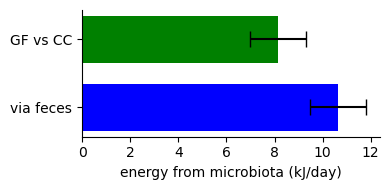

In [19]:
fig, axs = plt.subplots(1,1, figsize=(4,2))

####from carb calculation
#carbs
axs.barh(1,MOUSE["energy_from_microbiota_via_feces"],height=0.7,xerr=MOUSE["energy_from_microbiota_via_fecesSTD"],color='blue',capsize=capsize)
axs.barh(2,MOUSE["energy_from_microbiota"],height=0.7,xerr=MOUSE["energy_from_microbiota_via_fecesSTD"],color='green',capsize=capsize)

axs.set_xlabel("energy from microbiota (kJ/day)")
#bacterial dry mass
axs.set_yticks([1,2])
axs.set_yticklabels(["via feces","GF vs CC"])
#axs.set_ylim(ym,ymax)
axs.spines[['right', 'top']].set_visible(False)


fig.tight_layout()
fig.savefig("plot_output_figure5/mouse_energyestimations.pdf")





# Plot distributions into one plot

In [9]:
# Basic considerations of ATP yield